In [18]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the data

In [24]:
with open('initial_dynamics.npy', 'rb') as f: 
    Wsoc = np.load(f) #[N,N]
    x0 = np.load(f) #[N,1]

### Neuronal Dynamics
***
$\mathbf{\text{Euler method}}$<br>
***
&emsp;$$\tau \frac{dx}{dt} = -x + Wf\left(x, g\right)$$
&emsp;$$ \tau \frac{x(t+\Delta t) - x(t)}{\Delta t} = -x + Wf\left(x, g\right) $$
&emsp;&emsp;&emsp; $$ x(t+\Delta t) = x(t) +\frac{\Delta t}{\tau} \Bigg[-x(t) + Wf\left(x(t), g\right)\Bigg] $$
***

In [20]:
N = x0.shape[0] #Number of neurons
g0 = np.ones(x0.shape) #Vector of gains [N,1]  
T = 500 # Number of time steps

#Constants along the dynamics
r0, rmax = 20, 100
tau = 200
delta_t = 1 

In [25]:
#Define the non - linear function
def f(x,g):
    mask = x < 0
    R = np.zeros(x.shape) #[N,1]
    R[mask] = r0
    R[~mask] = rmax - r0  
    
    return R*np.tanh(x*g*(1./R)) #[N,1]

In [26]:
def euler_solution(x0, delta_t):
    x = np.zeros((N,T)) #[N,T]
    x[:,0] = x0.squeeze() #Set the initial dynamics 

    #Solve the dynamics with the Euler method
    for time in range(1,T):
        x_past = x[:,time -1] #[N,]
        x_past = np.expand_dims(x_past, 1) #[N,1]
        F = np.matmul(Wsoc, f(x_past,g0)) #[N,1]
        x_present = x_past + (delta_t/tau)*(-x_past + F) #[N,1]
    
        x[:,time] = x_present.squeeze()
    return x    

## Plots for diferent $\Delta t$ values

<ipython-input-56-b1b73c3f7c6f>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


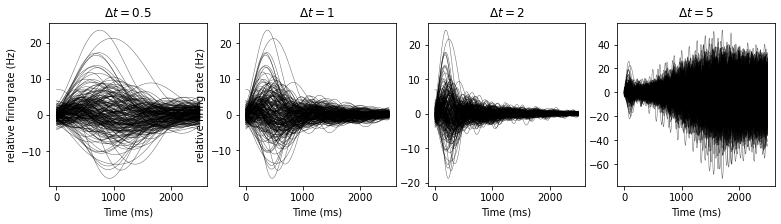

In [56]:
x = euler_solution(x0, delta_t = 0.5*delta_t)
x1 = euler_solution(x0, delta_t = delta_t)
x2 = euler_solution(x0, delta_t = 2*delta_t)
x3 = euler_solution(x0, delta_t = 5*delta_t)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize = (13,3), ncols = 4)
ax0.plot(np.linspace(0,2500,T), x.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax0.set_xlabel('Time (ms)') 
ax0.set_ylabel('relative firing rate (Hz)') 
ax0.set_title('$\Delta t = 0.5$')
ax1.plot(np.linspace(0,2500,T), x1.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax1.set_xlabel('Time (ms)') 
ax1.set_ylabel('relative firing rate (Hz)') 
ax1.set_title('$\Delta t = 1$') 
ax2.plot(np.linspace(0,2500,T), x2.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax2.set_xlabel('Time (ms)') 
ax2.set_title('$\Delta t =2$') 
ax3.plot(np.linspace(0,2500,T), x3.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax3.set_xlabel('Time (ms)') 
ax3.set_title('$\Delta t = 5$') 

fig.show()